<a href="https://colab.research.google.com/github/tuantran221/Project_Machine_Learning/blob/main/Model_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#import neccessery libs

In [ ]:
import os
import random
import tensorflow as tf
from shutil import copyfile
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

#Created folders contain dataset

In [ ]:
try:
  os.mkdir("CatAndDog")
  os.mkdir("CatAndDog/Train")
  os.mkdir("CatAndDog/Test")
  os.mkdir("CatAndDog/Train/Cats")
  os.mkdir("CatAndDog/Train/Dogs")
  os.mkdir("CatAndDog/Test/Cats")
  os.mkdir("CatAndDog/Test/Dogs")
except OSErros:
  pass

In [ ]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
  files = []
  for filename in os.listdir(SOURCE):
      file = SOURCE + filename
      if os.path.getsize(file) >0:
        files.append(filename)
      else:
        print(filename + "is zero length")
      
  training_length = int(len(files) * SPLIT_SIZE)
  testing_length = int(len(files) - training_length)
  shuffled_set = random.sample(files, len(files))
  training_set = shuffled_set[0:training_length]
  testing_set = shuffled_set[-testing_length:]

  for filename in training_set:
      this_file = SOURCE + filename
      destination = TRAINING + filename
      copyfile(this_file, destination)

  for filename in testing_set:
      this_file = SOURCE + filename
      destination = TESTING + filename
      copyfile(this_file, destination)
CAT_SOURCE_DIR ="./PetImages/Cat/"
TRAINING_CATS_DIR ="./CatAndDog/Train/Cats/"
TESTING_CATS_DIR ="./CatAndDog/Test/Cats/"
DOG_SOURCE_DIR = "./PetImages/Dog/"
TRAINING_DOGS_DIR = "./CatAndDog/Train/Dogs/"
TESTING_DOGS_DIR = "./CatAndDog/Test/Dogs/"

split_size = 0.9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR,TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)


666.jpgis zero length
11702.jpgis zero length


#Create Net Conv2D

In [ ]:
model = tf.keras.models.Sequential([
   tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape = (150,150,3)),
   tf.keras.layers.MaxPooling2D(2,2),

   tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
   tf.keras.layers.MaxPooling2D(2,2),

   tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
   tf.keras.layers.MaxPooling2D(2,2),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(512, activation='relu'),
   tf.keras.layers.Dense(1,activation='sigmoid')

])
model.compile(optimizer= RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 64)      

In [ ]:
TRAINING_DIR = "./CatAndDog/Train/"
train_datagen = ImageDataGenerator( rescale=1.0/255.)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size= 250,
                                                    class_mode='binary',
                                                    target_size=(150,150)
                                                    )
VALIDATION_DIR ="./CatAndDog/Test/"
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=250,
                                                              class_mode='binary',
                                                              target_size=(150,150))


Found 23627 images belonging to 2 classes.
Found 3717 images belonging to 2 classes.


#Train model

In [ ]:
history = model.fit(train_generator, epochs=15, steps_per_epoch=90,
                    validation_data= validation_generator, validation_steps=6)

Epoch 1/15
66/90 [=====================>........] - ETA: 2:16 - loss: 0.5355 - acc: 0.8093

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

90/90 [==============================] - 527s 6s/step - loss: 0.4790 - acc: 0.8241 - val_loss: 0.3999 - val_acc: 0.8560
Epoch 2/15
90/90 [==============================] - 518s 6s/step - loss: 0.2813 - acc: 0.8831 - val_loss: 0.3752 - val_acc: 0.8693
Epoch 3/15
90/90 [==============================] - 508s 6s/step - loss: 0.2324 - acc: 0.9038 - val_loss: 0.3221 - val_acc: 0.8887
Epoch 4/15
90/90 [==============================] - 509s 6s/step - loss: 0.1860 - acc: 0.9248 - val_loss: 0.4008 - val_acc: 0.8233
Epoch 5/15
90/90 [==============================] - 515s 6s/step - loss: 0.1391 - acc: 0.9462 - val_loss: 0.2743 - val_acc: 0.9287
Epoch 6/15
90/90 [==============================] - 509s 6s/step - loss: 0.1144 - acc: 0.9605 - val_loss: 0.4393 - val_acc: 0.8960
Epoch 7/15
90/90 [==============================] - 516s 6s/step - loss: 0.0830 - acc: 0.9735 - val_loss: 0.7123 - val_acc: 0.8480
Epoch 8/15
90/90 [==============================] - 507s 6s/step - loss: 0.0968 - acc: 0.9664 

In [ ]:
import numpy as np
from keras.preprocessing import image

#Predict result 

In [ ]:


path = '/content/drive/MyDrive/data/dog.12499.jpg' 
img = image.load_img(path,target_size= (150,150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0] > 0.5:
  print(path + " is a dog")
else:
  print(path + " is a cat")

[1.]
/content/drive/MyDrive/data/dog.12499.jpg is a dog


#Save model "dog-cat-model1.h5"

In [ ]:
model.save("dog-cat-model1.h5")

# Test model

In [ ]:
from keras.models import load_model
model = load_model("/content/drive/MyDrive/Project_ML/dataset/dog-cat-model1.h5")

In [ ]:
path = '/content/drive/MyDrive/Project_ML/dataset/PetImages/Dog/12478.jpg' 
img = image.load_img(path,target_size= (150,150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0] > 0.5:
  print(path + " is a dog")
else:
  print(path + " is a cat")

[1.]
/content/drive/MyDrive/Project_ML/dataset/PetImages/Dog/12478.jpg is a dog


In [ ]:
test_path = "/content/drive/MyDrive/Project_ML/dataset/CatAndDog/Test/"
cat_path = test_path +"Cats/"
print(cat_path)
dog_path = test_path + "Dogs/"


def predict(path):
  result = pd.DataFrame(["file_name" , "predict_value"])
  test_files = os.listdir(path)

  for file in test_files:
  
    image_path = path + file
    if file.lower().endswith((".jpg",".jpeg",".png")):
      img = image.load_img(image_path,target_size= (150,150))
      x = image.img_to_array(img)
      x = np.expand_dims(x, axis=0)

      images = np.vstack([x])
      y_pred = model.predict(images)
      print(y_pred)
 
      # predict_value = np.argmax(y_pred[0:1,:])

      row = {"file_names": file, "predict_value": y_pred}
      result = result.append(row, ignore_index= True)
    
  return result

/content/drive/MyDrive/Project_ML/dataset/CatAndDog/Test/Cats/


In [ ]:
cat_predict = predict(cat_path)
dog_predict = predict(dog_path)

[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]

In [ ]:
cat_predict

,0,file_names,predict_value
0,file_name,NaN,NaN
1,predict_value,NaN,NaN
2,NaN,10656.jpg,[[0.0]]
3,NaN,5773.jpg,[[0.0]]
4,NaN,8524.jpg,[[0.0]]
...,...,...,...
2464,NaN,3341.jpg,[[0.0]]
2465,NaN,4726.jpg,[[0.0]]
2466,NaN,9719.jpg,[[0.0]]
2467,NaN,2376.jpg,[[0.0]]


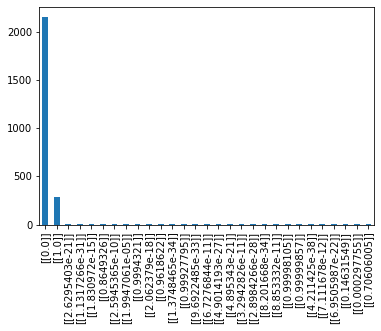

In [ ]:
cat_predict["predict_value"].value_counts().plot.bar()

In [ ]:
dog_predict

,0,file_names,predict_value
0,file_name,NaN,NaN
1,predict_value,NaN,NaN
2,NaN,12009.jpg,[[0.0]]
3,NaN,4400.jpg,[[1.0]]
4,NaN,401.jpg,[[1.0]]
...,...,...,...
1247,NaN,4853.jpg,[[1.0]]
1248,NaN,10260.jpg,[[1.0]]
1249,NaN,5405.jpg,[[1.0]]
1250,NaN,11481.jpg,[[1.0]]


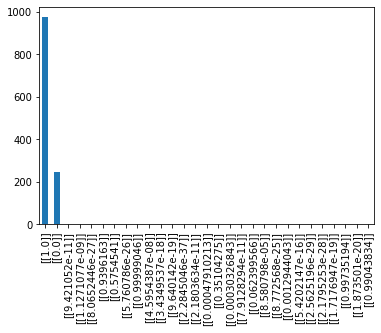

In [ ]:
dog_predict["predict_value"].value_counts().plot.bar()

In [ ]:
count_value_cat = cat_predict["predict_value"].value_counts()
count_value_dog = dog_predict["predict_value"].value_counts()
print(count_value_cat[0]/cat_predict.shape[0])
print(count_value_dog[0]/dog_predict.shape[0])


0.8703928716079384
0.7795527156549521


# Accuracy of model 

In [ ]:
(count_value_dog[0] + count_value_cat[0])/ (dog_predict.shape[0]+cat_predict.shape[0])

0.8398280032249396